In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import datetime as dt

In [2]:
filePath = 'Groceries_dataset.csv'

In [3]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
# change Date column type to Datetime

df.Date = pd.to_datetime(df.Date)
df.Date.dtype

dtype('<M8[ns]')

We actually can get the Retention Rate for Cohorts Analysis

In [5]:
df['month'] = df['Date'].apply(lambda x: dt.date(x.year, x.month,1))

df['initial_month'] = df.groupby('Member_number')['month'].transform('min')

df.loc[df['month'] != df['initial_month']].head()

,Member_number,Date,itemDescription,month,initial_month
0,1808,2015-07-21,tropical fruit,2015-07-01,2014-11-01
1,2552,2015-05-01,whole milk,2015-05-01,2014-02-01
2,2300,2015-09-19,pip fruit,2015-09-01,2014-03-01
3,1187,2015-12-12,other vegetables,2015-12-01,2014-08-01
5,4941,2015-02-14,rolls/buns,2015-02-01,2014-02-01


In [6]:
def diff_month(x):

    d1 = x['month']

    d2 = x["initial_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)

df.head()

,Member_number,Date,itemDescription,month,initial_month,cohort_idx
0,1808,2015-07-21,tropical fruit,2015-07-01,2014-11-01,9
1,2552,2015-05-01,whole milk,2015-05-01,2014-02-01,16
2,2300,2015-09-19,pip fruit,2015-09-01,2014-03-01,19
3,1187,2015-12-12,other vegetables,2015-12-01,2014-08-01,17
4,3037,2015-01-02,whole milk,2015-01-01,2015-01-01,1


In [7]:
def get_cohort_matrix(data, var='Member_number', fun=pd.Series.nunique):

    cd = data.groupby(['initial_month', 'cohort_idx'])[var].apply(fun).reset_index()

    cc = cd.pivot_table(index = 'initial_month',

                        columns = 'cohort_idx',

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cc, retention

In [57]:
cc, retention = get_cohort_matrix(df)

cc

cohort_idx,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
initial_month,,,,,,,,,,,,,,,,,,,,,
2014-01-01,605.0,98.0,87.0,87.0,108.0,102.0,103.0,74.0,74.0,102.0,...,81.0,86.0,82.0,90.0,78.0,84.0,67.0,93.0,84.0,73.0
2014-02-01,522.0,81.0,76.0,91.0,74.0,78.0,84.0,73.0,83.0,92.0,...,70.0,76.0,76.0,68.0,76.0,70.0,74.0,66.0,62.0,NaN
2014-03-01,440.0,62.0,79.0,64.0,70.0,68.0,58.0,88.0,69.0,55.0,...,52.0,59.0,59.0,75.0,63.0,57.0,68.0,54.0,NaN,NaN
2014-04-01,383.0,53.0,57.0,66.0,58.0,55.0,70.0,59.0,66.0,58.0,...,48.0,41.0,60.0,46.0,58.0,63.0,46.0,NaN,NaN,NaN
2014-05-01,319.0,39.0,49.0,57.0,57.0,53.0,42.0,56.0,40.0,30.0,...,41.0,54.0,42.0,31.0,45.0,46.0,NaN,NaN,NaN,NaN
2014-06-01,262.0,45.0,50.0,39.0,46.0,32.0,35.0,46.0,36.0,37.0,...,40.0,35.0,30.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,225.0,28.0,27.0,26.0,34.0,36.0,39.0,28.0,28.0,34.0,...,20.0,29.0,32.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,202.0,26.0,32.0,23.0,29.0,32.0,17.0,31.0,30.0,27.0,...,24.0,27.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,147.0,22.0,23.0,24.0,25.0,26.0,24.0,20.0,24.0,24.0,...,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


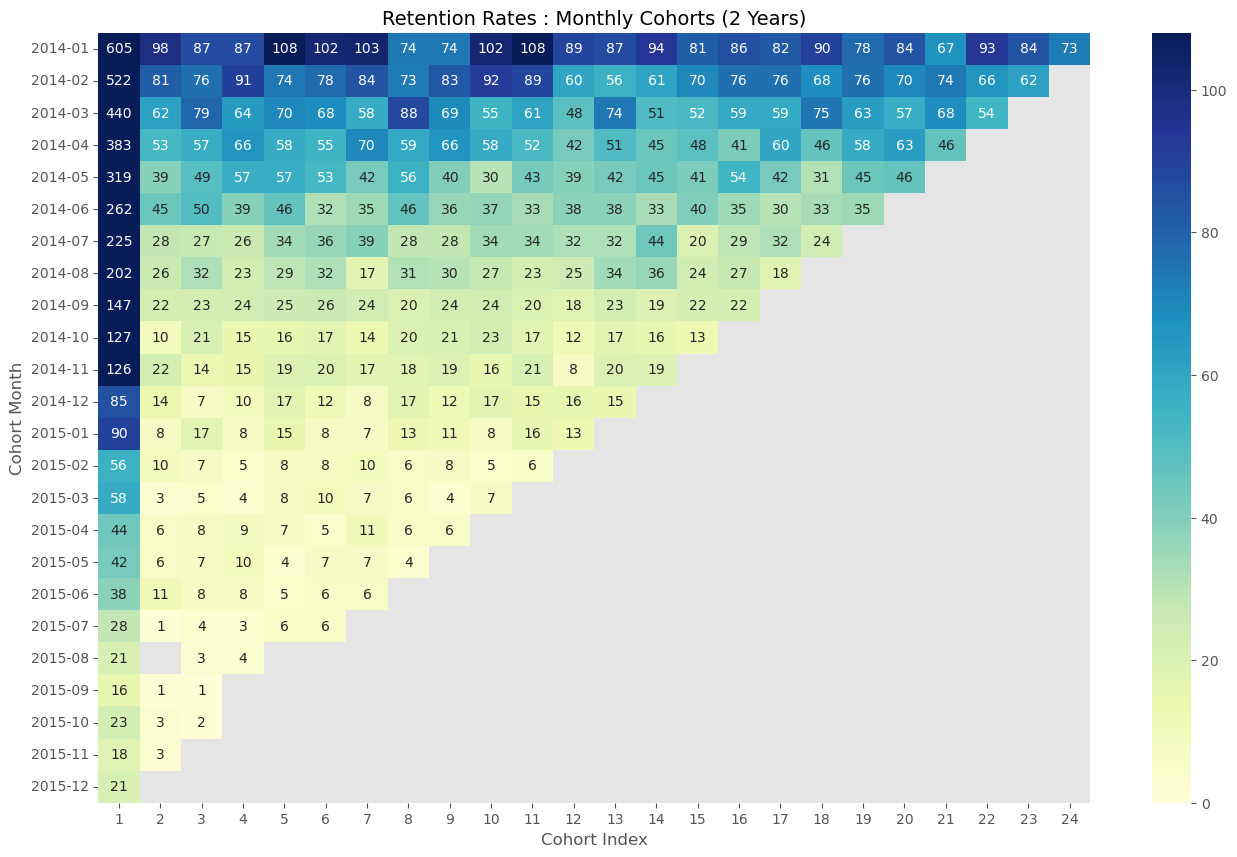

In [59]:
cc.index=cc.index.strftime('%Y-%m')

plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Retention Rates : Monthly Cohorts (2 Years)', fontsize = 14)
# Creating the heatmap
sns.heatmap(cc, annot = True,vmin = 0.0,vmax=108,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [99]:
lost_customers = list((cc[:-1][1]- cc[:-1][2]).values)
lost_customers.extend(list(cc[-1:][1].values))
lost_customers

[507.0,
 441.0,
 378.0,
 330.0,
 280.0,
 217.0,
 197.0,
 176.0,
 125.0,
 117.0,
 104.0,
 71.0,
 82.0,
 46.0,
 55.0,
 38.0,
 36.0,
 27.0,
 27.0,
 21.0,
 15.0,
 20.0,
 15.0,
 21.0]

[array([21., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])]

In [113]:
for i,idx in enumerate(cc.index):
    print(f'Churn Rate at {idx} Day 2 : ',end='')
    churns = ((lost_customers[i] / list(cc[i:i+1][1].values))*100)[0].round(2)
    print(churns) 

Churn Rate at 2014-01 Day 2 : 83.8
Churn Rate at 2014-02 Day 2 : 84.48
Churn Rate at 2014-03 Day 2 : 85.91
Churn Rate at 2014-04 Day 2 : 86.16
Churn Rate at 2014-05 Day 2 : 87.77
Churn Rate at 2014-06 Day 2 : 82.82
Churn Rate at 2014-07 Day 2 : 87.56
Churn Rate at 2014-08 Day 2 : 87.13
Churn Rate at 2014-09 Day 2 : 85.03
Churn Rate at 2014-10 Day 2 : 92.13
Churn Rate at 2014-11 Day 2 : 82.54
Churn Rate at 2014-12 Day 2 : 83.53
Churn Rate at 2015-01 Day 2 : 91.11
Churn Rate at 2015-02 Day 2 : 82.14
Churn Rate at 2015-03 Day 2 : 94.83
Churn Rate at 2015-04 Day 2 : 86.36
Churn Rate at 2015-05 Day 2 : 85.71
Churn Rate at 2015-06 Day 2 : 71.05
Churn Rate at 2015-07 Day 2 : 96.43
Churn Rate at 2015-08 Day 2 : 100.0
Churn Rate at 2015-09 Day 2 : 93.75
Churn Rate at 2015-10 Day 2 : 86.96
Churn Rate at 2015-11 Day 2 : 83.33
Churn Rate at 2015-12 Day 2 : 100.0


In [41]:
import numpy as np

In [60]:
cc[:-1][2] = cc[:-1][2].apply(lambda x: 0 if np.isnan(x) else x )

C:\Users\intel\AppData\Local\Temp\ipykernel_19932\1693723287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc[:-1][2] = cc[:-1][2].apply(lambda x: 0 if np.isnan(x) else x )


In [64]:
cc.index

Index(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
      dtype='object', name='initial_month')